In [23]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [24]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [48]:
X_train.shape

(60000, 28, 28)

In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

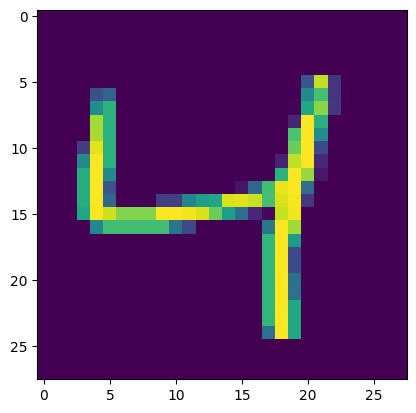

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [2]:
# Normalizing the data means scaling the pixel values to a range between 0 and 1. This is achieved by dividing each pixel value by 255 (the maximum pixel value).
# After normalization, pixel values will range between 0 (black) and 1 (white).

In [25]:
X_train = X_train/255
X_test = X_test/255

In [8]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [12]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2896 - accuracy: 0.9151 - val_loss: 0.1409 - val_accuracy: 0.9611
Epoch 2/25
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1188 - accuracy: 0.9642 - val_loss: 0.1273 - val_accuracy: 0.9614
Epoch 3/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0815 - accuracy: 0.9756 - val_loss: 0.1068 - val_accuracy: 0.9697
Epoch 4/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0605 - accuracy: 0.9802 - val_loss: 0.0961 - val_accuracy: 0.9705
Epoch 5/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0476 - accuracy: 0.9847 - val_loss: 0.0991 - val_accuracy: 0.9736
Epoch 6/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0400 - accuracy: 0.9871 - val_loss: 0.1033 - val_accuracy: 0.9719
Epoch 7/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0312 - accuracy: 0.9897 - val_loss: 0.1028 - val_accuracy:

In [13]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [14]:
y_pred = y_prob.argmax(axis=1)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9779

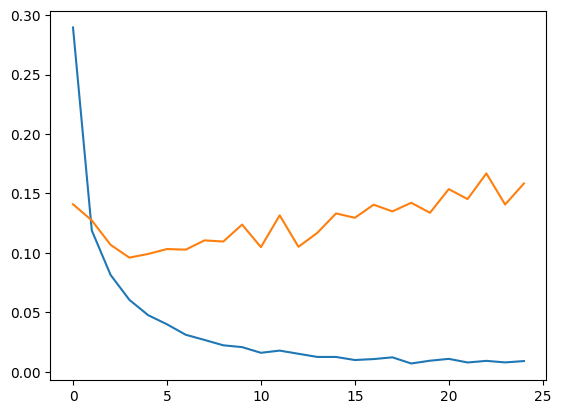

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

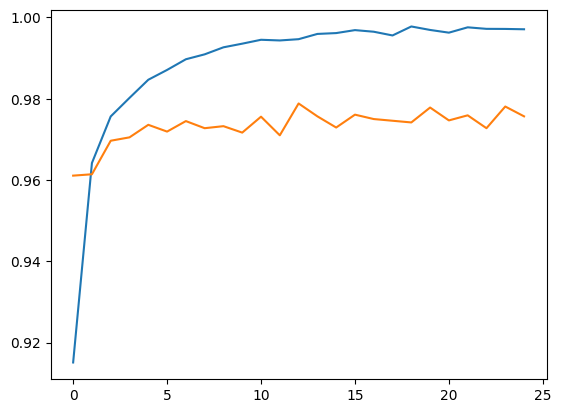

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [18]:
# Now Applying Batch Normalization

In [27]:
from tensorflow.keras.layers import BatchNormalization

In [30]:
model2 = Sequential()

model2.add(Flatten(input_shape=(28,28)))
model2.add(Dense(128,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(32,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(10,activation='softmax'))
model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               100480    
                                                                 
 batch_normalization_10 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dense_19 (Dense)            (None, 32)                4128      
                                                                 
 batch_normalization_11 (Ba  (None, 32)                128       
 tchNormalization)                                               
                                                                 
 dense_20 (Dense)            (None, 10)               

In [38]:
model2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [45]:
history2 = model2.fit(X_train,y_train,epochs=25,batch_size=64,validation_split=0.2)

Epoch 1/25
750/750 [==============================] - 4s 4ms/step - loss: 0.0062 - accuracy: 0.9982 - val_loss: 0.0888 - val_accuracy: 0.9802
Epoch 2/25
750/750 [==============================] - 4s 5ms/step - loss: 0.0030 - accuracy: 0.9993 - val_loss: 0.0923 - val_accuracy: 0.9808
Epoch 3/25
750/750 [==============================] - 3s 4ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0899 - val_accuracy: 0.9804
Epoch 4/25
750/750 [==============================] - 3s 3ms/step - loss: 0.0042 - accuracy: 0.9990 - val_loss: 0.1013 - val_accuracy: 0.9777
Epoch 5/25
750/750 [==============================] - 3s 4ms/step - loss: 0.0052 - accuracy: 0.9984 - val_loss: 0.1060 - val_accuracy: 0.9772
Epoch 6/25
750/750 [==============================] - 3s 4ms/step - loss: 0.0056 - accuracy: 0.9983 - val_loss: 0.1087 - val_accuracy: 0.9781
Epoch 7/25
750/750 [==============================] - 3s 4ms/step - loss: 0.0065 - accuracy: 0.9979 - val_loss: 0.0985 - val_accuracy: 0.9793
Epoch 

In [46]:
# Evaluate the model on the test set
test_loss, test_acc = model2.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 0s 1ms/step - loss: 0.0969 - accuracy: 0.9809
Test accuracy: 0.98089998960495


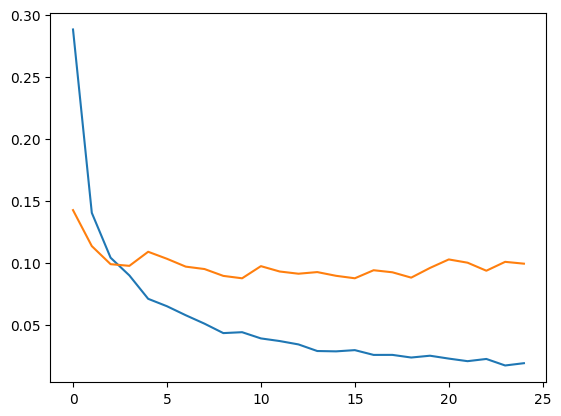

In [40]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

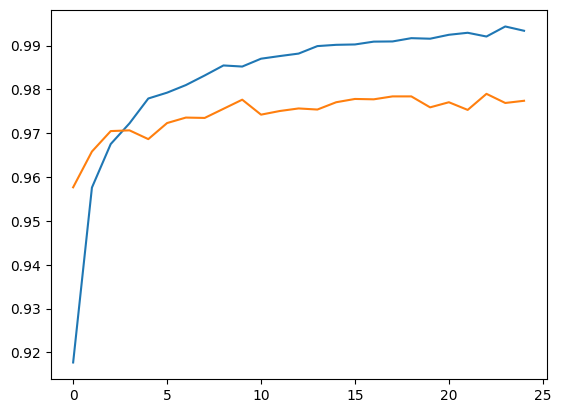

In [41]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])

In [42]:
# Comparitive Analysis

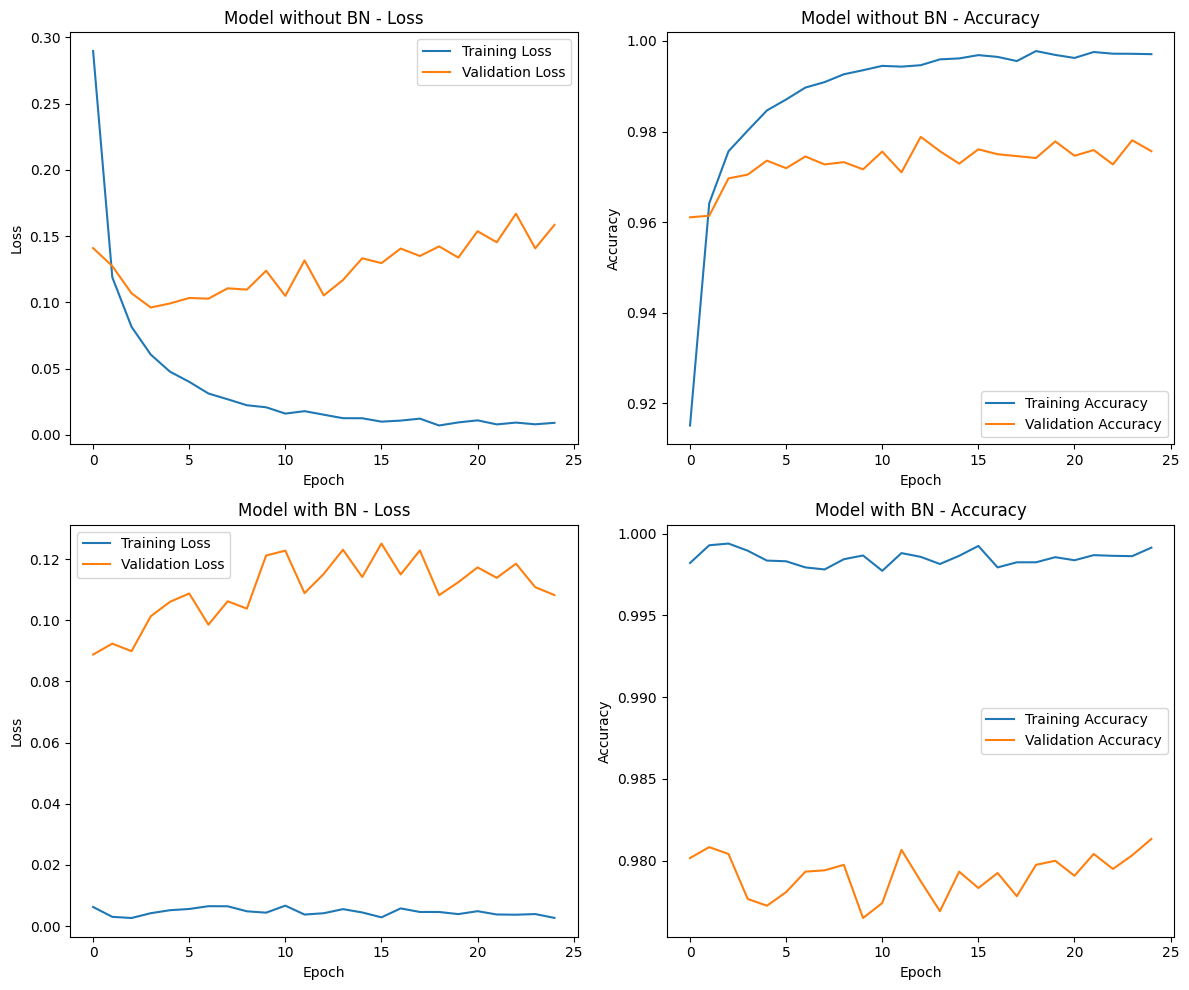

In [47]:
import matplotlib.pyplot as plt

# Plotting the loss and accuracy for both models in a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# First plot: Training and validation loss for the first model
axs[0, 0].plot(history.history['loss'], label='Training Loss')
axs[0, 0].plot(history.history['val_loss'], label='Validation Loss')
axs[0, 0].set_title('Model without BN - Loss')
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].legend()

# Second plot: Training and validation accuracy for the first model
axs[0, 1].plot(history.history['accuracy'], label='Training Accuracy')
axs[0, 1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[0, 1].set_title('Model without BN - Accuracy')
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('Accuracy')
axs[0, 1].legend()

# Third plot: Training and validation loss for the second model
axs[1, 0].plot(history2.history['loss'], label='Training Loss')
axs[1, 0].plot(history2.history['val_loss'], label='Validation Loss')
axs[1, 0].set_title('Model with BN - Loss')
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('Loss')
axs[1, 0].legend()

# Fourth plot: Training and validation accuracy for the second model
axs[1, 1].plot(history2.history['accuracy'], label='Training Accuracy')
axs[1, 1].plot(history2.history['val_accuracy'], label='Validation Accuracy')
axs[1, 1].set_title('Model with BN - Accuracy')
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].set_ylabel('Accuracy')
axs[1, 1].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
## We can see that before applying batch normalization, the Training loss is significantly decreased and loss was also decreased.
## In terms of Accuracy the Accuracy the training and Validation both Accuracies werre significantly increased. However there are
## other factors also can be look up to for more better results, Like Dropouts can be added after each Dense layer to prevent overfitting ,
## L2 regularization to the Dense layers to penalize large weights and help prevent overfitting.
## Callbacks Early Stopping: Stops training when the validation loss stops improving to prevent overfitting.
## ReduceLROnPlateau: Reduces the learning rate when the validation loss plateaus, which can help the model converge better.

## These adjustments should help improve the stability of your model and potentially improve its performance on the validation set.